<a href="https://colab.research.google.com/github/imWadson/Sistema-de-Recomendacao/blob/master/Sistema_de_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Modelagem de dados
import pandas as pd
import numpy as np

#Analise gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Avisos
import warnings
warnings.filterwarnings('ignore')

#Ajustes pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

#Ajustes matplot
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# **Importação dos Dados**

In [ ]:
Dados_Livros = pd.read_csv('Books.csv')
Dados_Avaliacao = pd.read_csv('Ratings.csv')
Dados_Usuario = pd.read_csv('Users.csv')

Dados_Livros.shape, Dados_Avaliacao.shape, Dados_Usuario.shape


((271360, 8), (1149780, 3), (278858, 3))

In [ ]:
Dados_Livros.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
Dados_Livros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
Dados_Avaliacao.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
Dados_Avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
Dados_Usuario.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
Dados_Usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#**Modelagem dos Dados**



In [ ]:
Tab_Cruzada = Dados_Livros.merge(Dados_Avaliacao, how='inner', on='ISBN')
Tab_Cruzada = Tab_Cruzada.merge(Dados_Usuario, how='inner', on='User-ID')

Tab_Cruzada.shape

(1031136, 12)

In [ ]:
Tab_Cruzada.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN


In [ ]:
Tab_Cruzada.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031136 non-null  object 
 1   Book-Title           1031136 non-null  object 
 2   Book-Author          1031135 non-null  object 
 3   Year-Of-Publication  1031136 non-null  object 
 4   Publisher            1031134 non-null  object 
 5   Image-URL-S          1031136 non-null  object 
 6   Image-URL-M          1031136 non-null  object 
 7   Image-URL-L          1031132 non-null  object 
 8   User-ID              1031136 non-null  int64  
 9   Book-Rating          1031136 non-null  int64  
 10  Location             1031136 non-null  object 
 11  Age                  753301 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [ ]:
'''
 Laço de repetição para encontrar string na coluna Ano

 for linha in Tab_Cruzada['Year-Of-Publication'].value_counts().index :
   print(linha) 

'''


Tab_Cruzada.iloc[352361, 3] = ''
Tab_Cruzada.iloc[467962, 3] = ''
Tab_Cruzada.iloc[469216, 3] = ''
Tab_Cruzada.iloc[287500, 3] = ''


Tab_Cruzada['Year-Of-Publication'] = pd.to_numeric(Tab_Cruzada['Year-Of-Publication'])

In [ ]:
Tab_Cruzada.dtypes

ISBN                    object
Book-Title              object
Book-Author             object
Year-Of-Publication    float64
Publisher               object
Image-URL-S             object
Image-URL-M             object
Image-URL-L             object
User-ID                  int64
Book-Rating              int64
Location                object
Age                    float64
dtype: object

In [ ]:
Tab_Cruzada.head(5)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN


In [ ]:
Tab_Cruzada['Location'].head(5)

0    stockton, california, usa
1     timmins, ontario, canada
2     timmins, ontario, canada
3     timmins, ontario, canada
4     timmins, ontario, canada
Name: Location, dtype: object

In [ ]:
Tab_Cruzada['Location'].tail(5)

1031131                       venice, florida, usa
1031132                   tioga, pennsylvania, usa
1031133                      madrid, madrid, spain
1031134                  grand prairie, texas, usa
1031135    bielefeld, nordrhein-westfalen, germany
Name: Location, dtype: object

In [ ]:
def Extrair_Pais (Região):
  
  Registro = Região.split(',')

  Fracao = Registro[-1].upper()

  return Fracao

Tab_Cruzada['Pais'] = Tab_Cruzada['Location'].apply(Extrair_Pais)

Tab_Cruzada.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age,Pais
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,USA
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",NaN,CANADA
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",NaN,CANADA
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",NaN,CANADA
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",NaN,CANADA


In [ ]:
Tab_Cruzada.isnull().sum()

ISBN                        0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         8
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
User-ID                     0
Book-Rating                 0
Location                    0
Age                    277835
Pais                        0
dtype: int64

In [ ]:
Tab_Cruzada.nunique()

ISBN                   270151
Book-Title             241071
Book-Author            101588
Year-Of-Publication       116
Publisher               16729
Image-URL-S            269842
Image-URL-M            269842
Image-URL-L            269839
User-ID                 92106
Book-Rating                11
Location                22480
Age                       141
Pais                      288
dtype: int64

In [ ]:
Tab_Cruzada.rename(
    columns={
        'Book-Title': 'Titulo',
        'Book-Author': 'Autor',
        'Year-Of-Publication': 'Ano_Publicacao',
        'Publisher': 'Editora',
        'Book-Rating': 'Avaliacao',
        'Location': 'Localização',
        'Age': 'Idade'  
    }, inplace=True
)


Tab_Cruzada.columns

Index(['ISBN', 'Titulo', 'Autor', 'Ano_Publicacao', 'Editora', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'User-ID', 'Avaliacao', 'Localização',
       'Idade', 'Pais'],
      dtype='object')

#**Visualização de Dados - Exploração**

In [ ]:
Tab_Cruzada.describe()

,Ano_Publicacao,User-ID,Avaliacao,Idade
count,1.031132e+06,1.031136e+06,1.031136e+06,753301.000000
mean,1.968195e+03,1.405945e+05,2.839051e+00,37.397648
std,2.311015e+02,8.052466e+04,3.854157e+00,14.098254
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000
25%,1.992000e+03,7.041500e+04,0.000000e+00,28.000000
50%,1.997000e+03,1.412100e+05,0.000000e+00,35.000000
75%,2.001000e+03,2.114260e+05,7.000000e+00,45.000000
max,2.050000e+03,2.788540e+05,1.000000e+01,244.000000


In [ ]:
Tab_Cruzada = Tab_Cruzada.loc[ Tab_Cruzada['Avaliacao'] > 0]

Tab_Cruzada.describe()

,Ano_Publicacao,User-ID,Avaliacao,Idade
count,383841.000000,383842.000000,383842.000000,269621.000000
mean,1965.636678,136031.461260,7.626701,36.835829
std,243.221296,80482.299401,1.841339,13.753045
min,0.000000,8.000000,1.000000,0.000000
25%,1992.000000,67591.000000,7.000000,28.000000
50%,1997.000000,133789.000000,8.000000,35.000000
75%,2001.000000,206219.000000,9.000000,45.000000
max,2050.000000,278854.000000,10.000000,244.000000


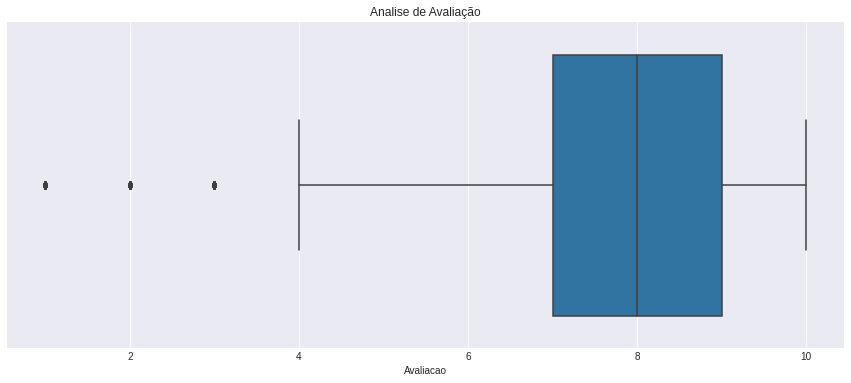

In [ ]:
plt.title('Analise de Avaliação')
sns.boxplot(data=Tab_Cruzada, x='Avaliacao')

In [ ]:
Analise = Tab_Cruzada.groupby( by=['Titulo']).agg(
    Quantidade = ('Titulo', 'count'),
    Media = ('Avaliacao', 'mean'),
    Max = ('Avaliacao', 'max'),
    Mediana = ('Avaliacao', 'median')
)

Analise.head()

,Quantidade,Media,Max,Mediana
Titulo,,,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",1,9.000000,9,9.0
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000,8,8.0
Dark Justice,1,10.000000,10,10.0
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",7,7.142857,10,7.0
Final Fantasy Anthology: Official Strategy Guide (Brady Games),2,10.000000,10,10.0


In [ ]:
Analise.sort_values('Quantidade', ascending=False).head()

,Quantidade,Media,Max,Mediana
Titulo,,,,
The Lovely Bones: A Novel,707,8.185290,10,8.0
Wild Animus,581,4.390706,10,4.0
The Da Vinci Code,494,8.439271,10,9.0
The Secret Life of Bees,406,8.477833,10,9.0
The Nanny Diaries: A Novel,393,7.437659,10,8.0


In [ ]:
px.scatter(
    data_frame = Analise,
    x= 'Quantidade', 
    y= 'Media',
    title = 'Media x Quantidade',
    # marginal_y='rug',
    # marginal_x='histogram'
)

In [ ]:
Analise.corr()

,Quantidade,Media,Max,Mediana
Quantidade,1.000000,0.018880,0.175572,0.036604
Media,0.018880,1.000000,0.889722,0.989839
Max,0.175572,0.889722,1.000000,0.887792
Mediana,0.036604,0.989839,0.887792,1.000000


In [ ]:
Analise['Quantidade'].describe()

count    135567.000000
mean          2.831382
std           9.135691
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: Quantidade, dtype: float64

In [ ]:
def Classificacao_Quantidade(Quantidade):
  if int(Quantidade) <= 5:
    return '1-5 Avaliações'

  elif int(Quantidade) <= 10:
   return '6-10 Avaliações'

  elif int(Quantidade) <= 50:
   return '11-50 Avaliações'

  elif int(Quantidade) <= 100:
   return '51-100 Avaliações'

  else:
    return '> 101 Avaliações'

Pizza = Analise['Quantidade'].apply(Classificacao_Quantidade).value_counts(normalize=True)

Pizza = pd.DataFrame(Pizza).reset_index()

In [ ]:
px.pie(
    data_frame=Pizza,
    names='index',
    values='Quantidade',
    title='Divisão das Quantidades'
)

In [ ]:
Analise_Ano = Tab_Cruzada['Ano_Publicacao'].value_counts().sort_index().reset_index()

Analise_Ano.head()

,index,Ano_Publicacao
0,0.0,5783
1,1376.0,1
2,1378.0,1
3,1806.0,1
4,1900.0,1


<BarContainer object of 18 artists>

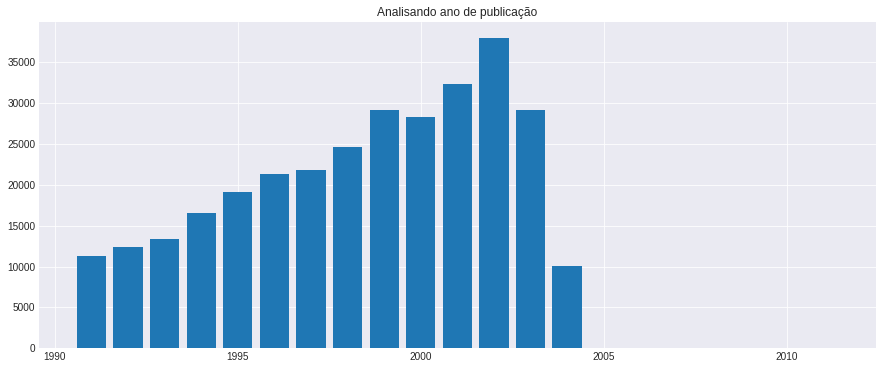

In [ ]:

Filtro =  Analise_Ano.loc[(Analise_Ano['index'] > 1990) & (Analise_Ano['index'] < 2020)]

plt.title('Analisando ano de publicação')
plt.bar(
    Filtro['index'],
    Filtro['Ano_Publicacao']
)

In [ ]:
Tab_Cruzada.groupby(by='Autor').agg(
    Quantidade =('Avaliacao', 'count'),
    Media = ('Avaliacao', 'mean')
).sort_values('Quantidade', ascending=False).head(10)

,Quantidade,Media
Autor,,
Stephen King,4639,7.815046
Nora Roberts,2938,7.629680
John Grisham,2550,7.523137
James Patterson,2387,7.697947
J. K. Rowling,1746,8.970218
Mary Higgins Clark,1677,7.503280
Janet Evanovich,1490,7.944966
Dean R. Koontz,1475,7.572203
Anne Rice,1245,7.387952


In [ ]:
Tab_Cruzada['Pais'].value_counts(normalize=True).head(10) * 100

 USA               72.392584
 CANADA             9.019179
 UNITED KINGDOM     3.207336
 GERMANY            2.682187
                    2.352648
 AUSTRALIA          1.768729
 SPAIN              1.451603
 N/A                1.083950
 FRANCE             1.031775
 PORTUGAL           0.676923
Name: Pais, dtype: float64

In [ ]:
Tab_Cruzada['Pais'].value_counts(normalize=True).cumsum().head(10) * 100

 USA               72.392584
 CANADA            81.411763
 UNITED KINGDOM    84.619100
 GERMANY           87.301287
                   89.653935
 AUSTRALIA         91.422664
 SPAIN             92.874267
 N/A               93.958217
 FRANCE            94.989992
 PORTUGAL          95.666915
Name: Pais, dtype: float64

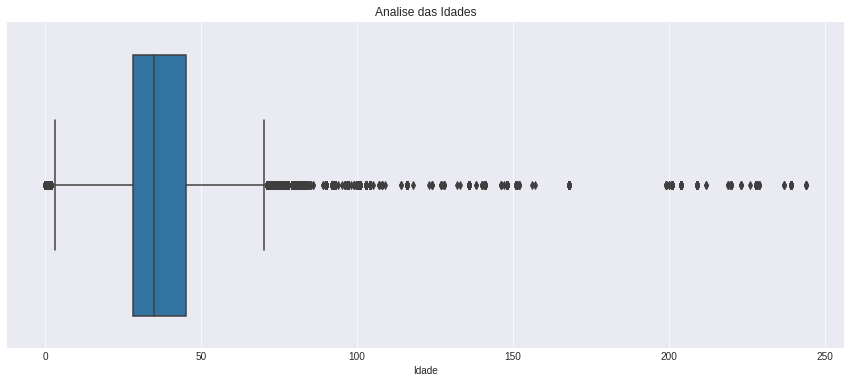

In [ ]:
plt.title('Analise das Idades')
sns.boxplot(data=Tab_Cruzada, x='Idade')

#**Construção do Modelo**